<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/03_pytorch_computer_vision.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=50417)

# **Computer Vision**

[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see. For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)), whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)), identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)) or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## **Where does computer vision get used?**

If you use a smartphone, you've already used computer vision. Camera and photo apps use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.
Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.
Manufacturers use computer vision to **identify defects **in various products.
Security cameras use computer vision to **detect potential intruders**.
In essence, anything that can described in a **visual** sense can be a potential computer vision problem.

## What we're going to cover

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **4. Making predictions and evaluting model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

# Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains CV datasets, model architectures and image transformations. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Many example CV datasets; [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | Commonly used CV model architectures implemented in PyTorch. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Common image transformations (turn into numbers/process/augment). |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes are **not only for computer vision** in PyTorch, they are capable of dealing with many different types of data.


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


# **1. Getting Dataset**
PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets` containing a lot of example datasets for use to practice writing computer vision code on. FashionMNIST (MNIST stands for Modified National Institute of Standards and Technology) in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) is one of those datasets. The dataset contains grayscale images of 10 different kinds of clothing.


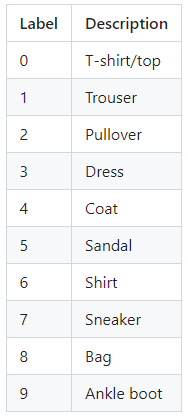

And since it has 10 different image classes (different types of clothing), it is a **multi-class classification** problem.
![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)

**Mine**:

PyTorch Dataset and Pandas DataFrame are both **data structures** commonly used in data analysis and machine learning tasks, but they have **different purposes** and **functionalities**:
1. **Pandas DataFrame**: Pandas DataFrame provides a **tabular representation** of data, similar to a table in a relational database. It is commonly used in data analysis and preparation tasks such as to **filter**, **transform**, **aggregate**, and **visualize** data.
2. **PyTorch Dataset**: It is specifically designed for handling data in the PyTorch framework to **access and manipulate the training or testing data** required for machine learning tasks. It allows efficient loading and preprocessing of data, such as **transforming images** or applying **data augmentation** techniques.




To download the FashinMNIST PyTorch dataset, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [2]:
train_data = datasets.FashionMNIST(
    root="data",          # where to download data to?
    train=True,           # get training data
    download=True,        # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)
train_data

100%|██████████| 26421880/26421880 [00:01<00:00, 16041213.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271463.93it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5095021.22it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6880904.08it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,          # get test data
    download=True,
    transform=ToTensor()
)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Now the data is save in the FashinMNIST is stored in directory data. How many samples are there?

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.

What classes are there?

## **1.1. Inspecting Classe Names**

We can inspect them by checking out the **class names** as a **list** (`.classes`) and **class names** as a **dictionary** (`.class_to_idx`) attributes as well as the lengths of the training and test sets.

In [6]:
class_names_list = train_data.classes
class_names_list

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_names_dict = train_data.class_to_idx
class_names_dict

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

It looks like we're dealing with 10 different kinds of clothes. Let us see the labels.

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

Because we're working with 10 different classes, it means the problem is **multi-class classification**.

## **1.2. Indexing Image Tensors and Labels**

The premise remains: **encode data into numbers**, **build a model to find patterns** in those numbers, **convert those patterns into something** meaningful.

Let's check out the first sample of the training data.

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

What's the shape of the image? Let's see the image shape.

In [ ]:
print(f"Image shape: {image.shape}-> [color_channels, height, weight]")
print(f"Label: {label} <-> Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])-> [color_channels, height, weight]
Label: 9 <-> Image label: Ankle boot


The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale; **grayscale colors have 1 image channel: the pixel value is 0 for black and 1 if it is pure white**.
> **Note**: If `color_channels=3`, the image comes in pixels for **red**, **green** and **blue** (aka [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of the current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for **number of images** (batch size). For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.


![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)


PyTorch generally accepts `NCHW` (channels first) as the default for many operators.
However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).
For now, since the dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when working on larger image datasets and using convolutional neural networks (we'll see these later).


> **Mine**: Convert the dataset to a Pandas DataFrame

In [ ]:
import numpy as np
import pandas as pd
# Load FashionMNIST dataset
dataset = train_data

# Get the image shape
image_shape = dataset.data.shape[1:]
num_pixels = np.prod(image_shape)

# Convert the dataset to a Pandas DataFrame
data = dataset.data.reshape(-1, num_pixels).numpy()
columns = ['Pixel_' + str(i+1) for i in range(num_pixels)]
train_df = pd.DataFrame(data, columns=columns)
train_df['Target'] = dataset.targets.numpy()

# Print the DataFrame
train_df.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Load FashionMNIST dataset
dataset = test_data

# Get the image shape
image_shape = dataset.data.shape[1:]
num_pixels = np.prod(image_shape)

# Convert the dataset to a Pandas DataFrame
data = dataset.data.reshape(-1, num_pixels).numpy()
columns = ['Pixel_' + str(i+1) for i in range(num_pixels)]
test_df = pd.DataFrame(data, columns=columns)
test_df['Target'] = dataset.targets.numpy()

# Print the DataFrame
test_df.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,6


## **1.3. Visualizing the Data as Image**

In [ ]:
import matplotlib.pyplot as plt
image_tensor, label = train_data[0]
print(f"Image shape: {image_tensor.shape}")
# image_tensor

Image shape: torch.Size([1, 28, 28])


In [ ]:
image_tensor.squeeze().shape

torch.Size([28, 28])

The input shape of `[1,28,28]` (that is, **color channels first**) does **not match with** what `matplotlib` expects the **color channels to be last**. Or it expects the height and width with **no color channel for grayscale images**????????????.

For now for the grayscale, we can get rid of the extra dimension using `.squeeze`.

Image shape: torch.Size([1, 28, 28])


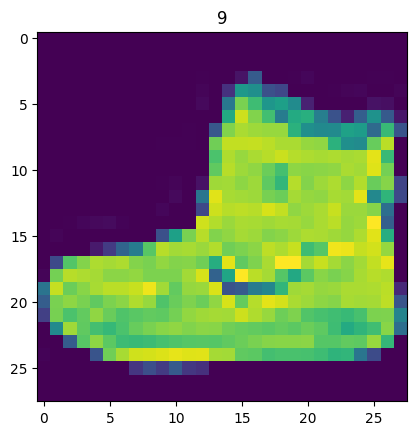

In [ ]:
import matplotlib.pyplot as plt
image_tensor, label = train_data[0]
print(f"Image shape: {image_tensor.shape}")
plt.imshow(image_tensor.squeeze()) # image shape is [28, 28] (height, width)
plt.title(label);

Since it is a $28\times 28$ pixels image, not a very high definition image.

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

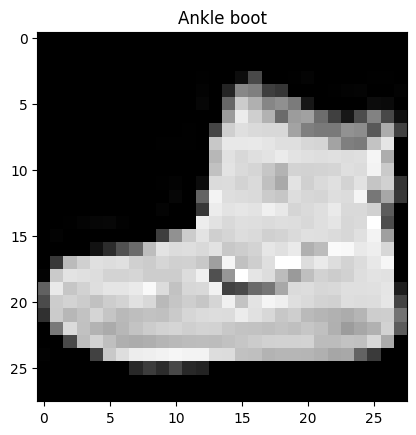

In [ ]:
plt.imshow(image_tensor.squeeze(), cmap="gray")
plt.title(class_names[label]);

Let us remove the axis:

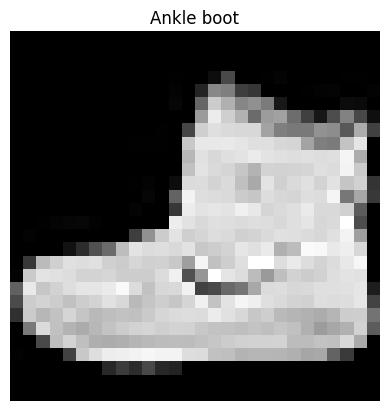

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more random sample of images.

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

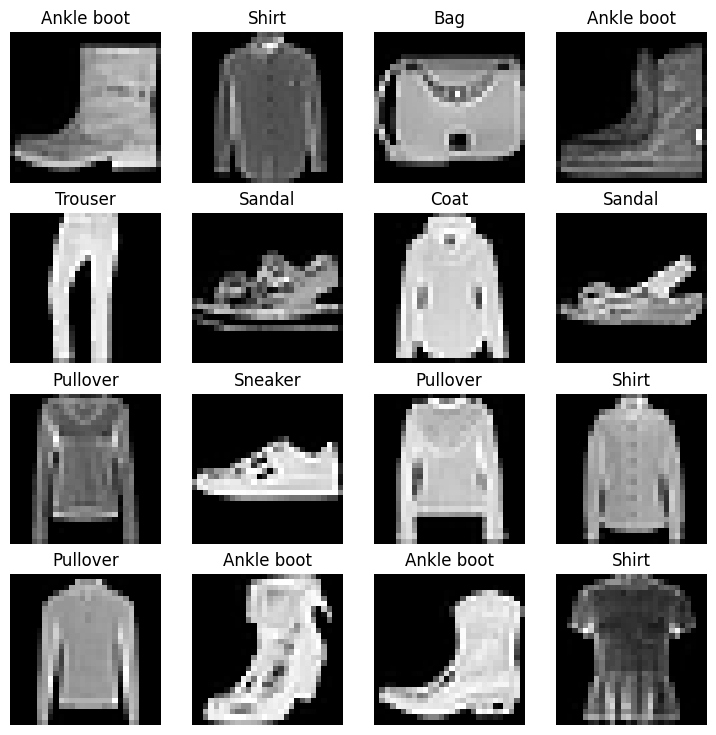

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

This dataset doesn't look too aesthetic.
But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.
In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.
Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?
You probably could.

But I think coding a model in PyTorch would be faster.

> Do you think the above data can be model with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?

# **2. Prepare DataLoader**
Right now the data is in the form of PyTorch Datasets.  

PyTorch Dataset is typically used in combination with PyTorch **Dataloader**, which helps in loading the data in parallel during model training or evaluation. It provides features like **shuffling**, **batching**, and **multiprocessing**.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).

The **DataLoader** turns a large `Dataset` into a Python **iterable** of **smaller chunks** to be loaded into a model for training and inference.
These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?  Because

> 1) It's more **computationally efficient**.
In an ideal world we could do the forward pass and backward pass across **all of the data**  at once(for the FashinMNIST dataset, 60000 images at one hit). While using really large datasets, unless we've got infinite computing power, it's easier to break them up into batches (for the FashinMNIST dataset, 32 images at time).

> 2) It also gives the model **more opportunities to improve or update its gradients** per epoch. With **mini-batches**, gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?
[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.
But since this is a value we can set (a **hyperparameter**) we can try all different kinds of values, though generally **powers of 2** are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
**Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.**

Let's create **DataLoader**'s for the training and test sets.

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data,                           # dataset to turn into iterable
    batch_size=BATCH_SIZE,                # how many samples per batch?
    shuffle=True                          # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False                         # not necessary to shuffle testing data
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79357dddbc70>,
 <torch.utils.data.dataloader.DataLoader at 0x79357dddaaa0>)

We have got **instances** of data loader. Let us check out what we have created and attributes.

In [ ]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}.")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}.")

Length of train dataloader: 1875 batches of 32.
Length of test dataloader: 313 batches of 32.


> **Mine**: The lengths of the train or test DataLoaders represent the **number of batches**: ceil(number of samples / batch size).

In [ ]:
import math
math.ceil(60000/32), math.ceil(10000/32)

(1875, 313)

In [ ]:
print(f"Length of train dataloader dataset: {len(train_dataloader.dataset)}.")
print(f"Length of test dataloader dataset: {len(test_dataloader.dataset)}.")

Length of train dataloader dataset: 60000.
Length of test dataloader dataset: 10000.


Check out what's inside the training dataloader

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Each batch has `[32, 1, 28, 28]`.  And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


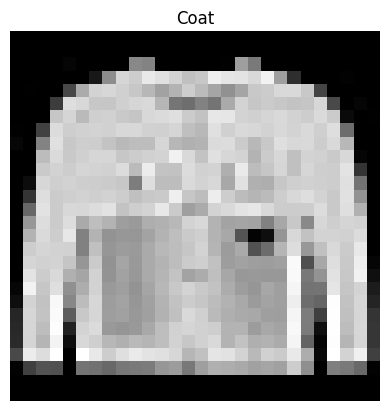

In [ ]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off"); # can use False (without quotes)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

> **Mine**: The `enumerate()` function in Python is used to iterate over a sequence (such as a list, tuple, or string) while **keeping track of the index** of each element. It returns an **iterator of tuples containing the index and the corresponding element** from the sequence.

```
c = [('apple', 'red'), ('banana', 'yellow'), ('orange', 'orange')]

for b, (a, b) in enumerate(c):
    print(f"Index: {b}, Value a: {a}, Value b: {b}")
```
Output
```
Index: 0, Value a: apple, Value b: red
Index: 1, Value a: banana, Value b: yellow
Index: 2, Value a: orange, Value b: orange
```

In [ ]:
# # Illustration using Regression with small dataset is better for understanding
# for a, (b, c) in enumerate(train_dataloader):
#     print(f"a is batch index: {a}")
#     print(f"b is X: {b}")
#     print(f"c is y: {c}")
#     if a == 0:
#       break


The length of X and y at each sequence in the for loop is the batch size.

# **3. Model 0: Build a baseline model**

Data loaded and prepared!


Time to build a **baseline model** by subclassing `nn.Module`.
A **baseline model** is one of the simplest models we can imagine. Say a model consisting of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers similar to which we've done as in the previous sections.  But there's going to **one slight difference**. Because we're working with **image** data, we're going to use a **different layer to start** things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer that **compresses the dimensions of a tensor into a single vector**.

Get a single sample.

In [ ]:
x = train_features_batch[0]
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]


Create as flatten layer. All `nn` modules function as a model (or can do a forward pass).


In [ ]:
flatten_model = nn.Flatten()  #
x_flat = flatten_model(x)     # Flatten the sample, say, perform forward pass
print(f"Shape after flattening: {x_flat.shape} -> [color_channels, height*width]")

Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took the shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Let see the display of the numbers between the two.

In [ ]:
# print(x)
# print(x_flat)

Why do this? Because `nn.Linear()` layers, neural networks in general, require the inputs to be in the form of (feature) vectors. So we've now turned the pixel data from **height and width dimensions** into one long **features vector**.

So how many input features are there? The number of input features are 784 (height $\times$ width = 784 pixels).

Let's create our first model using `nn.Flatten()` as the first layer.

## **3.1. Define Model**

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int
                 ):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),                 # Inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layers_stack(x)

## **3.2. Instantiate Model**

We've defined a baseline model class we can use, now let's instantiate a model setting following parameters:
* `input_shape=784` - Number of input features: 28 pixels high by 28 pixels wide = 784 features.
* `hidden_units=10` - number of units/neurons in the hidden layer(s) (hyperparameter).
* `output_shape=len(class_names)` - It is a multi-class classification problem.

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,            # one for every pixel (can put also as 784)
    hidden_units=10,              # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.__class__.__name__ # returns model name only if it is created in a class

'FashionMNISTModelV0'

Let's **keep the instance of the model to CPU** for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [ ]:
model_0.to("cpu")

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layers_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layers_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

## **3.3. Dummy Predictions**

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
with torch.inference_mode():
  outputs = model_0(dummy_x)
outputs, outputs.shape, len(outputs.squeeze())

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]]),
 torch.Size([1, 10]),
 10)

The model outputs 10 logit predictions.

Without flatten, it **raises an error**. On the otherhand, if you set the input shape to 28, it performs but the **output shape will not be correct**.

## **3.4. Setup Loss, Optimizer and Evaluation Metrics**

We could import various evaluation metrics from the [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/) package.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# Import accuracy metric
from helper_functions import accuracy_fn as accuracy_metric
# Note: could also use torchmetrics.
# Accuracy(task = 'multiclass', num_classes = len(class_names)).to(device)

## **3.5. Creating Experiment Timing Function**

Two important things to be tracked during experimentation are:

> 1) the **model's performance** (loss and accuracy values) and

> 2) **computational time** (how fast the model runs).

Let's make a timing function to measure the time it takes the model to train on CPU versus using a GPU.
The timing function will import the [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) function from the Python [`timeit`](https://docs.python.org/3/library/timeit.html) module.

In [ ]:
from timeit import default_timer as timer
def train_time(
    start: float,
    end: float,
    device: torch.device = None
    ):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Example

In [ ]:
start = timer()
# some code
end = timer()
train_time(start = start, end = end, device = "cpu")

Train time on cpu: 0.000 seconds


3.655199907370843e-05

## **3.6. Training Model on Batches of Data and Testing Model**

We'll be using the same steps as the previous exercises, though since the data is now in batch form, we'll add **another loop to loop through the batches of the dataset**. A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels).

The batch data are contained within the `train_dataloader` and `test_dataloader` for the training and test data splits, respectively. Since we're using `BATCH_SIZE=32`, the batches have 32 samples of images and targets. And since we're computing on batches of data, the loss and evaluation metrics will be calculated **per batch** and then **averaged for each epoch** to the number of batches in each dataset's respective DataLoader.


In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
from tqdm.auto import tqdm # progress bar

n = len(train_dataloader.dataset) # total number of samples

torch.manual_seed(42)
time_start = timer()

epochs = 3 # small just for faster training times
for epoch in tqdm(range(1, epochs + 1)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    train_acc = 0
    for batch_idx, (X, y) in enumerate(train_dataloader): # Loop through training batches
        model_0.train()
        y_pred = model_0(X)                   # 1. Forward pass
        y_pred_labels = y_pred.argmax(dim=1)  # (logits -> pred_prob -> pred_labels), softmax is skipped
        loss = criterion(y_pred, y)           # 2. Calculate loss (per batch)
        train_loss += loss
        train_acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
        optimizer.zero_grad()                 # 3. Optimizer zero grad
        loss.backward()                       # 4. Loss backward
        optimizer.step()                      # 5. Optimizer step
        if (batch_idx + 1) % 500 == 0:        #    Number of samples seen
            print(f"Looked at {(batch_idx + 1) * BATCH_SIZE} of {n} samples.") # BATCH_SIZE = len(X) =len(y)
    train_loss /= len(train_dataloader)       # Average loss per epoch
    train_acc /= len(train_dataloader)        # Average accuracy per epoch
    ### Testing
    test_loss, test_acc = 0, 0                # Variables for accumulating loss and accuracy
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)               # 1. Forward pas
            test_pred_labels = test_pred.argmax(dim=1)
            test_loss += criterion(test_pred, y_test) # 2. Accumulate losses and accuracies per epoch
            test_acc += accuracy_metric(y_true = y_test, y_pred = test_pred_labels)
        test_loss /= len(test_dataloader)             #  Need to be in `torch.inference_mode()`
        test_acc /= len(test_dataloader)              #  Need to be in `torch.inference_mode()`
    print(f"\nLoss (train, test): {train_loss:.5f}, {test_loss:.5f} | Accuracy (train, test): {train_acc:.2f}%, {test_acc:.2f}%.\n")
# Calculate training time
time_end = timer()
train_time_model_0 = train_time(
    start = time_start,
    end = time_end,
    device = str(next(model_0.parameters()).device)
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Looked at 16000 of 60000 samples.
Looked at 32000 of 60000 samples.
Looked at 48000 of 60000 samples.

Loss (train, test): 0.59039, 0.50954 | Accuracy (train, test): 79.17%, 82.04%.

Epoch: 2
-------
Looked at 16000 of 60000 samples.
Looked at 32000 of 60000 samples.
Looked at 48000 of 60000 samples.

Loss (train, test): 0.47633, 0.47989 | Accuracy (train, test): 83.32%, 83.20%.

Epoch: 3
-------
Looked at 16000 of 60000 samples.
Looked at 32000 of 60000 samples.
Looked at 48000 of 60000 samples.

Loss (train, test): 0.45503, 0.47664 | Accuracy (train, test): 84.05%, 83.43%.

Train time on cpu: 27.393 seconds


Looks like the baseline model did fairly well. It didn't take too long to train either, even just on the CPU. Hope, it will speed up on the GPU.


## **3.7. Model Predictions and Evaluation**

It's a good idea to write some code to evaluate differerent trained models of same purpose in similar ways.

Namely, let's create a function that takes in a **trained model**, a `DataLoader`, a **loss** function and an **accuracy** function. It is same as the testing mode except functionalizing and returning a dictionary of results.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader, # why not specified as test because test_data_loader will be the argument
    criterion: torch.nn.Module,
    accuracy_metric
    ):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)                     # Make predictions with the model
            y_pred_labels = y_pred.argmax(dim=1)
            loss += criterion(y_pred, y)          # Accumulate loss and accuracy per batch
            acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
                                                  # Scale loss and acc to average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model is created with a class
        "model_loss": loss.item(),
        "model_acc": acc
        }

Calculate model 0 results on test dataset

In [ ]:
model_0_results = eval_model(
    model = model_0,
    data_loader = test_dataloader,
    criterion = criterion,
    accuracy_metric = accuracy_metric
    )
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Looking good! We can use the results dictionary to compare the baseline model results to other models later on.

To keep track of the number of epochs we've been through, we can also add the progress bar by importing `tqdm` from `tqdm.auto` ([`tqdm`](https://github.com/tqdm/tqdm) is one of the most popular progress bar libraries for Python and `tqdm.auto` automatically decides what kind of progress bar is best for your computing environment, e.g. Jupyter Notebook vs. Python script).

# **4. Model 1: Model with Non-Linearity**

## **4.1. Setup Device Agnostic-Code**

Model training time is dependent on hardware used. Generally, **more processors means faster training** and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for the models and data to run on GPU if it's available.

If you're using Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

First let us check whether GPU is available using `!nvidia-smi` or `torch.cuda.is_available(`).

In [ ]:
!nvidia-smi

Mon Sep  4 14:27:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If GPU is not available, it says something like:

```
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that
the latest NVIDIA driver is installed and running.
```

In [ ]:
torch.cuda.is_available()

True

If GPU is availabe, the above code returns `True`, otherwise `False`.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **4.2. Model with Linear and Non-Linear Layers**

Now let us recreat a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int
                 ):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layers_stack(x)

## **4.3. Create Model Instance**


Now let's instantiate it with the same settings we used before.

We'll need `input_shape=28*28` (equal to the number of features of the image data), `hidden_units=10` (starting small and the same as the baseline model) and `output_shape=len(class_names)` (one output unit per class).

> **Note:** Notice how we kept most of the settings of the model the same except for one change: adding **non-linear layers**. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again.

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape = 28*28,            # number of input features
    hidden_units = 10,
    output_shape = len(class_names) # number of output classes desired
).to(device)                        # send model to GPU if it's available
next(model_1.parameters()).device   # check model device

device(type='cuda', index=0)

## **4.4. Loss, Optimizer and Evaluation Metrics**

As usual, we'll setup a loss function, an optimizer and an evaluation metric (we could do multiple evaluation metrics but we'll stick with accuracy for now).

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

So far we've been writing train and test loops over and over. Let's write them again but in **function forms** so they can be called again and again.
And because we're using device-agnostic code now, we'll be **sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors**.

## **4.5. Functionizing Training Loop**

Following is a function called `train_step()` which takes in a **model**, a `DataLoader` a **loss** function and an **optimizer**.

In [ ]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    criterion: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_metric,
    device: torch.device = device
    ):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch_idx, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)     #    Send data to GPU if any
        y_pred = model(X)                     # 1. Forward pass
        y_pred_labels = y_pred.argmax(dim=1)  #    pred labels <- pred logits
        loss = criterion(y_pred, y)           # 2. Calculate loss
        train_loss += loss
        train_acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
        optimizer.zero_grad()                 # 3. Optimizer zero grad
        loss.backward()                       # 4. Loss backward
        optimizer.step()                      # 5. Optimizer step

    train_loss /= len(data_loader)            #    Loss per epoch
    train_acc /= len(data_loader)             #    Accuracy per epoch
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

## **4.6. Functionizing Testing/Evaluation Loop**

The testing loop is similar to the training loop but it'll be called `test_step()` that will take in a **model**, a `DataLoader`, a **loss** function and an **evaluation** metric.

In [ ]:
def test_step(
    data_loader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    criterion: torch.nn.Module,
    accuracy_metric,
    device: torch.device = device
    ):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode(): # inference context manager
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)           #    Send data to GPU if any
            test_pred = model(X)                        # 1. Forward pass
            test_pred_labels = test_pred.argmax(dim=1)  #    pred logits -> pred labels
            test_loss += criterion(test_pred, y) # 2. Calculate loss and accuracy
            test_acc += accuracy_fn(y_true=y, y_pred = test_pred_labels)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

> **Note:** Since the training and testing loops are functions, we can customize them in any way we like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

## **4.7. Train and Test Model**

Now we've got some functions for training and testing our model, let's run them.
We'll do so inside another loop for each epoch.
That way for each epoch we're going a training and a testing step.

> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [ ]:
torch.manual_seed(42)

t_start = timer() # Measure time
epochs = 3
for epoch in tqdm(range(1, epochs + 1)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader = train_dataloader,
        model = model_1,
        criterion =criterion,
        optimizer = optimizer,
        accuracy_metric = accuracy_metric
        )
    test_step(
        data_loader = test_dataloader,
        model = model_1,
        criterion = criterion,
        accuracy_metric = accuracy_metric
    )
t_end = timer()

train_time_model_1 = train_time(
    start = t_start,
    end = t_end,
    device = device
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 2
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 3
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 30.899 seconds


In [ ]:
print(f"Model 0 on: {next(model_0.parameters()).device}, Model 1 on {next(model_1.parameters()).device}.")
print(f"Model 0 training time {train_time_model_0}, Model 1 training time {train_time_model_1}.")

Model 0 on: cpu, Model 1 on cuda:0.
Model 0 training time 35.68662055899995, Model 1 training time 39.2641370780002.


The model trained but the **training time looks longer** while using the GPU. Why did it happen?

One reason could be because the dataset and model are both so small. The **benefits of using a GPU are outweighed by the time it actually takes to transfer the data** there. There's a small **bottleneck** between copying data from the CPU memory (default) to the GPU memory. So for smaller models and datasets, the CPU might actually be the optimal place to compute on. But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.

Note also that the training time on CUDA vs CPU will depend largely on the **quality of the CPU/GPU hardware** being used. The hardware being used may potentially have better CPU in terms of compute capacity than the GPU (rare).

Let's evaluate the trained `model_1` using the `eval_model()` function and see how it went.


In [ ]:
torch.manual_seed(42)
model_1_results = eval_model(
    model = model_1,
    data_loader = test_dataloader,
    criterion = criterion,
    accuracy_metric = accuracy_metric
    )
model_1_results

RuntimeError: ignored

What causes the run time error to occur?
> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

The reason for the above error occurrence is due to the `eval_model()` function is **not written to be  device agnostic** or it is **not device agnostic code**.

So we can fix that by passing a target `device` parameter to the `eval_model()` function and try calculating the results again.

In [ ]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader, # why not specified as test because test_data_loader will be the argument
    criterion: torch.nn.Module,
    accuracy_metric,
    device: torch.device = device
    ):
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)                     # Make predictions with the model
            y_pred_labels = y_pred.argmax(dim=1)
            loss += criterion(y_pred, y)          # Accumulate loss and accuracy per batch
            acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
                                                  # Scale loss and acc to average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model is created with a class
        "model_loss": loss.item(),
        "model_acc": acc
        }

Compute `model_1` results with device-agnostic code.

In [ ]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    criterion = criterion, accuracy_metric = accuracy_metric,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

Check the baseline `model_0` results

In [ ]:
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    criterion = criterion, accuracy_metric = accuracy_metric,
    device = device
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

It looks like adding **non-linearities to the model** made it perform **worse** than the baseline. Such things happen in machine learning because **what we thought should work does not**, and **what we thought might not work does**.

It seems like our model is **overfitting** on the training data. Overfitting means the model is **learning the training data well** but those patterns are **not generalizing to the testing data**.

There are ways to prevent overfitting in machine learning. Two of the main to fix overfitting include:
1. Using a **smaller** model.
2. Using a **larger dataset** (the more data, the more chance a model has to learn generalizable patterns).
3. Using a **different model** (some models fit certain kinds of data better than others)

Let's take a look at number 3: using a **different model**.

# **5. Model 2: Convolutional Neural Network (CNN)**

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet) which are known for their **capabilities to find patterns in visual data**.

And since we're dealing with visual data, let's see if using a CNN model can improve upon the baseline.
The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.
It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

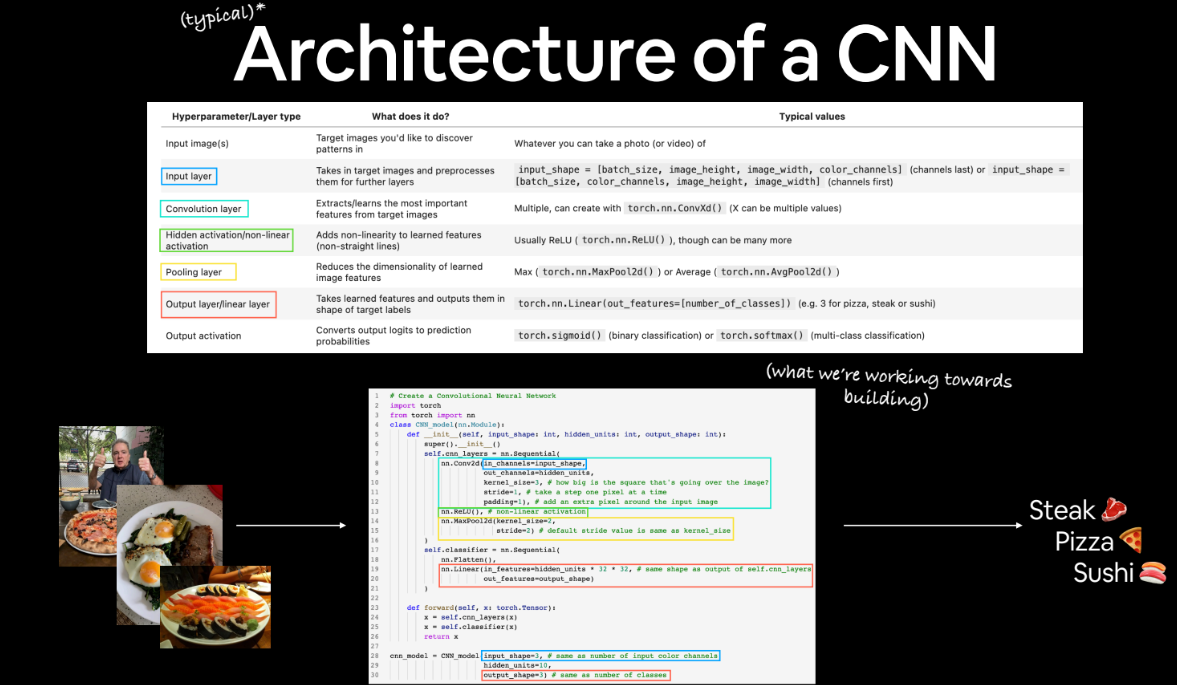

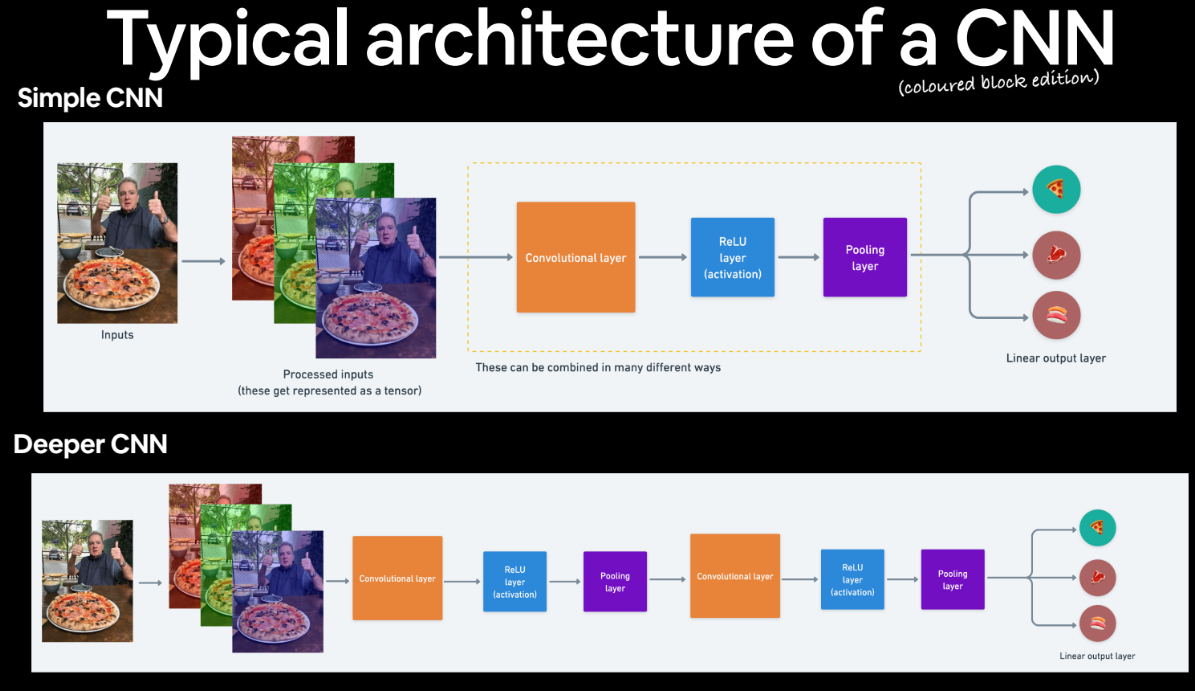

**What model to use?**
This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |


Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website (I have to read in details).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.

## **5.1. Replicating TinnyVGG CNN Architecture**

Create a convolutional neural network that replicates model architecture copying [TinyVGG](https://poloclub.github.io/cnn-explainer/). Other different types of CNN model architectures: VGG116 (original ones), VGGNet, ResNet, LeNet, AlexNet, ZF Net, ...

In [ ]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,  # <- (3,3), size of square going over z image: (3,3)
                      stride = 1,       # default
                      padding = 1),     # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
                                                          # Where did this in_features shape the classifier layer come from?
                                                          # It's because each layer of the network compresses and
                                                          # changes the shape of the inputs data.
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 0 * 0, # in features is multiplied by 0, a trick to be used to calculate this

                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(f"Output shape of Conv Block 1: {x.shape}.")
        x = self.conv_block_2(x)
        print(f"Output shape of Conv Block 2: {x.shape}.")
        x = self.classifier(x)
        print(f"Output shape of classifier: {x.shape}")
        return x

The biggest model yet! What we've done is a common practice in machine learning: finding a model architecture somewhere and replicating it with code.

Let us instantiate the model.

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape = 1, # Number of color channels (gray), but TinnyVGG uses 3 (RGB), so it could be 3 for them
    hidden_units = 10,
    output_shape = len(class_names)
    ).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


> **Mine Note**: Because each layer of the network compresses and changes the shape of the inputs data, where did the `in_features` shape for the output layer (`nn.Linear(in_features = hidden_units * ? * ?, out_features = output_shape)`) come from? For the time begin set as 0. Daniel says there is a trick to calculate this, to be covered later.

In [ ]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=10, bias=True)
  )
)

We could start using the model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a **convolutional** layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a **max pooling** layer.

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

## **5.2. Convolutional Layer: [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)**

What does the `2d` in `nn.Conv2d()` stand for?

The `2d` is for 2-dimensional data. As in, the images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width. For other dimensional data (such as **`1d` for text** or **`3d` for 3D object**s), there's also `nn.Conv1d()` and `nn.Conv3d()`.

1. To test the layers out, let's create some dummy input data just like the data used on CNN Explainer. Create sample **batch of random numbers** with **same size as image batch**.

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))  # [batch_size, color_channels, height, width]
test_image = images[0]                      # get a single image for testing
print(f"Test image shape:{test_image.shape}") # 3 inputs: color channel, height and width
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
# print(f"Single image pixel values:\n{test_image}")

Test image shape:torch.Size([3, 64, 64])
Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]


2. Create a convolutional layer with same dimensions as TinyVGG (try changing any of the parameters and see what happens).
  Let's create an example `nn.Conv2d()` with various parameters:
  * `in_channels` (int) - Number of channels in the input image.
  * `out_channels` (int) - Number of channels produced by the convolution.
  * `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
  * `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
  * `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.
3. Pass the input data through the convolutional layer.

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels = 3,     # <- test_image.shape, but 'color channel' is 1st but in TinnyVGG last
                       out_channels = 10,
                       kernel_size = 3,     # <- (3, 3), kernel also called a filter
                       stride = 1,
                       padding = 0)         # also try using "valid" or "same" here
conv_layer_output = conv_layer(test_image)
conv_layer_output, conv_layer_output.shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

Notice what happens to the shape (the same shape as the first layer of TinyVGG on [CNN Explainer](https://poloclub.github.io/cnn-explainer/)), we get different channel sizes as well as different pixel sizes.

What if we changed the the kernel size of `conv_layer`?

In [ ]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (5, 5),
                       stride = 1,
                       padding = 0)
conv_layer_2_output = conv_layer_2(test_image)
conv_layer_2_output, conv_layer_2_output.shape

(tensor([[[-5.9479e-01,  5.1592e-01, -1.5861e+00,  ..., -9.0964e-02,
            4.6227e-01, -6.0360e-01],
          [ 3.4598e-01, -1.7241e-01, -4.1079e-01,  ...,  1.6331e-01,
            5.2090e-01,  1.3144e+00],
          [-2.8077e-02, -4.4019e-01, -1.2165e+00,  ..., -2.4385e-01,
           -2.4841e-01,  3.5551e-01],
          ...,
          [ 6.3600e-01,  2.2507e-01,  2.0247e-01,  ...,  3.0973e-01,
            1.3567e-01,  7.5306e-02],
          [-8.4161e-01,  1.1192e-01,  1.7929e-01,  ...,  5.0107e-01,
           -6.6306e-01,  4.7155e-01],
          [ 1.0285e+00,  1.5175e+00,  5.5489e-01,  ..., -7.3607e-01,
           -7.1551e-01, -8.6667e-01]],
 
         [[ 1.3999e-01, -1.2239e+00, -1.0109e+00,  ...,  6.2065e-01,
           -7.5165e-01,  1.1006e+00],
          [-4.6926e-01,  4.6811e-01,  2.8089e-01,  ..., -2.5950e-01,
            1.1656e+00, -2.9479e-01],
          [ 1.5869e-01, -1.5092e-01,  1.5218e+00,  ...,  4.4120e-01,
            1.9650e-01,  5.0309e-01],
          ...,
    

The output is smaller as the kernel size increases.
What's going on here?

Behind the scenes, the `nn.Conv2d()` is compressing the information stored in the image.
It does this by performing operations on the input (the test image) against its internal parameters.
The goal of this is similar to all of the other neural networks we've been building.
Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is **how the different layers calculate their parameter updates** or in PyTorch terms, the operation present in the layer `forward()` method.
If we check out the `.state_dict()`, we'll find a similar weight and bias setup as we've seen before.

In [ ]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

Look at that! A bunch of random numbers for a weight and bias tensor.
The shapes of these are manipulated by the inputs we passed to `nn.Conv2d()` when we set it up.
Let's check them out and get shapes of weight and bias tensors within `conv_layer_2`.

In [ ]:
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


Changing stride to 2 (skipping two pixels at a time):

`stride = 2 <- stride = 1`

In [ ]:
torch.manual_seed(42)

conv_layer_3 = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3, 3),
                       stride = 2,
                       padding = 0)
conv_layer_3_output = conv_layer_3(test_image)
conv_layer_3_output.shape

torch.Size([10, 31, 31])

The output halves as we have skipping 2 pixels at a time.

Changing padding:

`padding = 1 <- padding = 0`

In [ ]:
torch.manual_seed(42)

conv_layer_4 = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3, 3),
                       stride = 1,
                       padding = 1)
conv_layer_4_output = conv_layer_4(test_image)
conv_layer_4_output.shape

torch.Size([10, 64, 64])

Changing the out channels:

`out_channels = 64 <- out_channels = 10`



In [ ]:
torch.manual_seed(42)

conv_layer_5 = nn.Conv2d(in_channels = 3,
                       out_channels = 64,
                       kernel_size = (3, 3),
                       stride = 1,
                       padding = 1)
conv_layer_5_output = conv_layer_5(test_image)
conv_layer_5_output.shape

torch.Size([64, 64, 64])

What should we set the parameters of the `nn.Conv2d()` layers?
Similar to many other things in machine learning, the values of these aren't set in stone (and recall, because these values are ones we can set ourselves, they're referred to as **hyperparameters**).
>
> The best way to find out is to try out different values and see how they effect the model's performance.
>
> Or even better to find a working example on a similar problem (like we've done with TinyVGG) and copy it.

We're working with a different of layer here to what we've seen before.
But the premise remains the same: start with random numbers and update them to better represent the data.

## **5.3. Max Pooling Layer: [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)**

Now let's check out what happens when we move data through `nn.MaxPool2d()`. It has **no learnable parameters** unlike `nn.Conv2d()`.

1. Create a sample `nn.MaxPoo2d()` layer
2. Pass data through just the `conv_layer`
3. Pass data through the `max_pool_layer`

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 1)
conv_layer_output = conv_layer(test_image)
conv_layer_output.shape

torch.Size([10, 64, 64])

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will effects the size of the output shape; in the above case, the shape halves from a `64x64` image to `32x32` image.

Let's see this work with a smaller tensor.

Create a random tensor with a similiar number of dimensions to the images.

In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

Random tensor:
tensor([[[0.3367, 0.1288],
         [0.2345, 0.2303]]])
Random tensor shape: torch.Size([1, 2, 2])


Create a max pool layer, pass the random tensor through the max pool layer, and see what happens when we change the kernel_size value.

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Max pool tensor:
tensor([[[0.3367]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1])


Notice the final two dimensions between `random_tensor` and `max_pool_tensor`, they go from `[2, 2]` to `[1, 1]`.

In essence, they get halved.
And the change would be different for different values of `kernel_size` for `nn.MaxPool2d()`.

Also notice the value leftover in `max_pool_tensor` is the **maximum** value from `random_tensor`.

What's happening here?
This is another important piece of the puzzle of neural networks.
Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, **patterns that are predictive whilst also being smaller in size** than the original values.

From an AI perspective, we could consider the whole goal of a neural network to **compress** information.

![each layer of a neural network compresses the original input data into a smaller representation that is (hopefully) capable of making predictions on future input data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, **intelligence is compression**.

This is the idea of the use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.
In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a `nn.Conv2d()` layer.

Except instead of just taking the maximum, the `nn.Conv2d()` performs a **convolutional operation** on the data (see this in action on the [CNN Explainer](https://poloclub.github.io/cnn-explainer/)) webpage.

> What do you think the [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) layer does? Try making a random tensor like we did above and passing it through. Check the input and output shapes as well as the input and output values.

## **5.4. Input Features of Output Layer**

In [ ]:
image_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

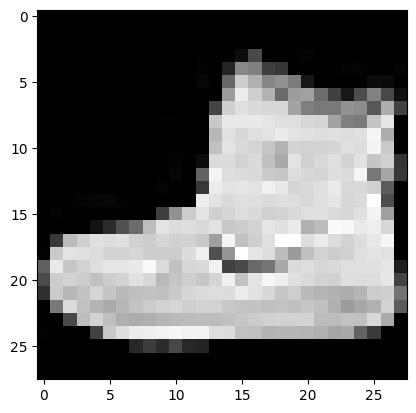

In [ ]:
image = plt.imshow(image_tensor.squeeze(), cmap = "gray")
image;

1. Create a random tensor.

In [ ]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
# plt.imshow(rand_image_tensor.squeeze(), cmap = "gray")

2. Pass the random tensor through the model

> **Mine**: This will provide the shapes of the output of the two convolutional blocks which will help as determine the in-features of the last layer of the model. There is also a formula to be used for such in the documentation of [Conv2d()](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

In [ ]:
# model_2(rand_image_tensor.unsqueeze(0).to(device))

The inner dimensions of conv block 1 and 2 outputs do not match.
* `[1, 10, 7, 7]` => batch = `1`, hidden units = `1`0, output shape of conv block 2 = `(7, 7)`.
* `10x49` => `10` is the hidden units and `49` (= `7x`7) is the flattened output of conv block 2.
* Hence, the in-features of the last layer is modified as:
  `nn.Linear(in_features = hidden_units * 7 * 7, out_features = output_shape)`.

In [ ]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,  # <- (3,3), size of square going over z image: (3,3)
                      stride = 1,       # default
                      padding = 1),     # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 7 * 7,  # A trick is to be used to calculate this
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f"Output shape of Conv Block 1: {x.shape}.")
        x = self.conv_block_2(x)
        # print(f"Output shape of Conv Block 2: {x.shape}.")
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape = 1,
    hidden_units = 10,
    output_shape = len(class_names)
    ).to(device)

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

## **5.5. Training and Testing CNN Model**

We've stepped through the layers in our first CNN enough. But remember, if something still isn't clear, try starting small. Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!
We'll use `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).
And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.1`.
We'll use the `train_step()` and `test_step()` functions we created before.
We'll also measure the time to compare it to our other models.

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, hidden_units = 10,
                              output_shape = len(class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

t_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader = train_dataloader,
        model = model_2,
        criterion = criterion,
        optimizer = optimizer,
        accuracy_metric = accuracy_metric,
        device = device
    )
    test_step(data_loader = test_dataloader,
        model = model_2,
        criterion = criterion,
        accuracy_metric = accuracy_metric,
        device = device
    )

t_end = timer()
train_time_model_2 = train_time(start =t_start, end = t_end, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.57857 | Train accuracy: 79.03%
Test loss: 0.38963 | Test accuracy: 85.68%

Epoch: 1
---------
Train loss: 0.35520 | Train accuracy: 87.23%
Test loss: 0.36796 | Test accuracy: 86.03%

Epoch: 2
---------
Train loss: 0.31576 | Train accuracy: 88.62%
Test loss: 0.32613 | Test accuracy: 88.19%

Train time on cuda: 47.865 seconds


Looks like the convolutional and max pooling layers helped improve performance  of the model. Let's evaluate results of `model_2` with the `eval_model()` function.

In [ ]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    criterion = criterion,
    accuracy_metric = accuracy_metric
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261343240737915,
 'model_acc': 88.18889776357827}

## **5.6. Comparing Models' Performances and Computing Times**

A regular practice in machine learning is building multiple models and performing multiple training experiments to see which performs best.
We have trained three model so far:
1. `model_0` - the baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as the baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

**Performance**

Recall the three model results.

In [ ]:
print(f"Model 0: {model_0_results}, \nModel 1: {model_1_results}, \nModel 2: {model_2_results}")

Model 0: {'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}, 
Model 1: {'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}, 
Model 2: {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3261343240737915, 'model_acc': 88.18889776357827}


Let's combine the model results dictionaries into a DataFrame and find out.

In [ ]:
models_results_df = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
    ])
models_results_df

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.326134,88.188898


We can also visualize models' results.

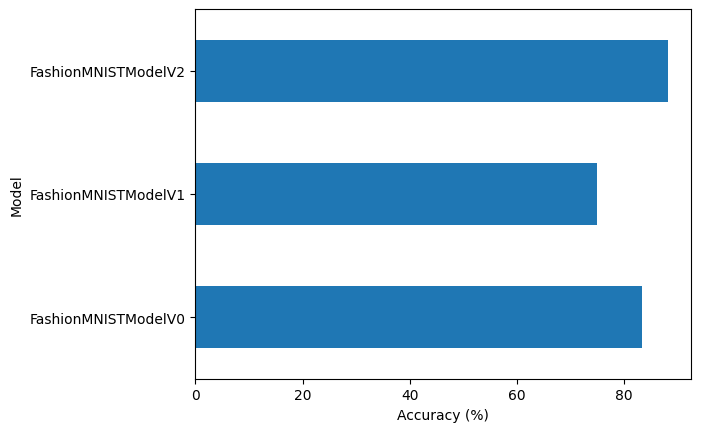

In [ ]:
models_results_df.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

**Computing Time**

In [ ]:
print(f"Model 0: {train_time_model_0}, \nModel 1: {train_time_model_1}, \nModel 2: {train_time_model_2}")

Model 0: 35.68662055899995, 
Model 1: 39.2641370780002, 
Model 2: 47.86534334299995


We can add the training time values to the dataframe for comparison too.

In [ ]:
models_results_df["training_time"] = [train_time_model_0, train_time_model_1, train_time_model_2]
models_results_df

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,35.686621
1,FashionMNISTModelV1,0.685001,75.019968,39.264137
2,FashionMNISTModelV2,0.326134,88.188898,47.865343


It looks like the CNN (`FashionMNISTModelV2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.
And the baseline model (`FashionMNISTModelV0`) performed better than `model_1` (`FashionMNISTModelV1`).

**Performance-Speed Tradeoff**

Something to be aware of in machine learning is the **performance-speed** tradeoff.
Generally, we get better performance out of a larger, more complex model (like we did with `model_2`).
However, this performance increase often comes at a sacrifice of training speed and inference speed.

> **Note:** The training times we get will be very dependant on the hardware we use. Generally, the more CPU cores we have, the faster the models will train on CPU. And similar for GPUs. Newer hardware (in terms of age) will also often train models faster due to incorporating technology advances.



## **5.7. Predictions on Random Samples and Visualization**

Alright, we've compared the three models to each other, let's further evaluate the best performing model, `model_2`.

To do so, let's create a function `make_predictions()` where we can pass the **model** and some **data** for it to predict on.

In [ ]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)       # Add an extra (batch) dim and send to device
            pred_logits = model(sample).squeeze()                    # Forward pass (model outputs raw logits)
            pred_probabs = torch.softmax(pred_logits, dim = 0)       # note: softmax on z "logits" dim, not on "batch" dim
                                                                     # (in this case we have a batch size of 1, so can perform on dim=0)
            pred_probs.append(pred_probabs.cpu())                    # Get pred_prob off GPU for further calculations
    return torch.stack(pred_probs)                                   # Stack the pred_probs to turn list into a tensor

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
list(test_data)[:5]

[(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

In [ ]:
# test_data[:10]

`ValueError: only one element tensors can be converted to Python scalars`

In [ ]:
test_data[0][:10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# test_data[0][:10].shape

`AttributeError: 'tuple' object has no attribute 'shape'`

In [ ]:
image_tensor, label = test_data[0][:10]
# image_tensor.shape, label.shape

`AttributeError: 'int' object has no attribute 'shape'`

In [ ]:
image_tensor, label = test_data[0][:10]
image_tensor.shape, label

(torch.Size([1, 28, 28]), 9)

We get a shape of the tensor and associated label.

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9): # 9 samples from test_data, not the test_data_loader
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


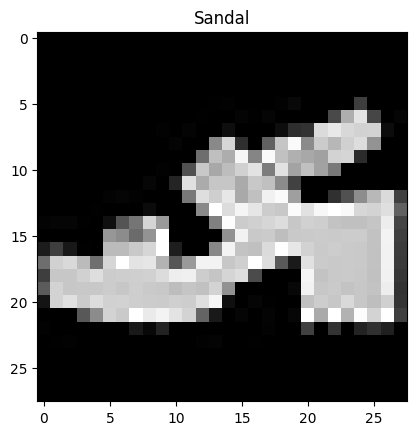

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray");
plt.title(class_names[test_labels[0]]);

And now we can use our `make_predictions()` function to predict on `test_samples`. Make predictions on test samples with model 2.

In [ ]:
pred_probs= make_predictions(model = model_2, data = test_samples)
pred_probs[:2] # View first two prediction probabilities list

tensor([[5.7075e-09, 7.1255e-11, 2.1862e-10, 1.4028e-10, 4.1757e-09, 9.9993e-01,
         2.8177e-07, 3.0831e-07, 1.1394e-06, 6.9190e-05],
        [5.4731e-01, 2.7543e-01, 1.1705e-03, 6.0166e-02, 3.7698e-02, 3.1709e-05,
         7.7839e-02, 1.2709e-04, 1.8448e-04, 4.3676e-05]])

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 7, 2, 3, 0, 4, 7, 1])

To see whether the predictions in the same form as the test labels.

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 0, 7, 2, 3, 0, 4, 7, 1]))

Now the predicted classes are in the same format as the test labels, we can compare.
Since we're dealing with image data, let's visualize.

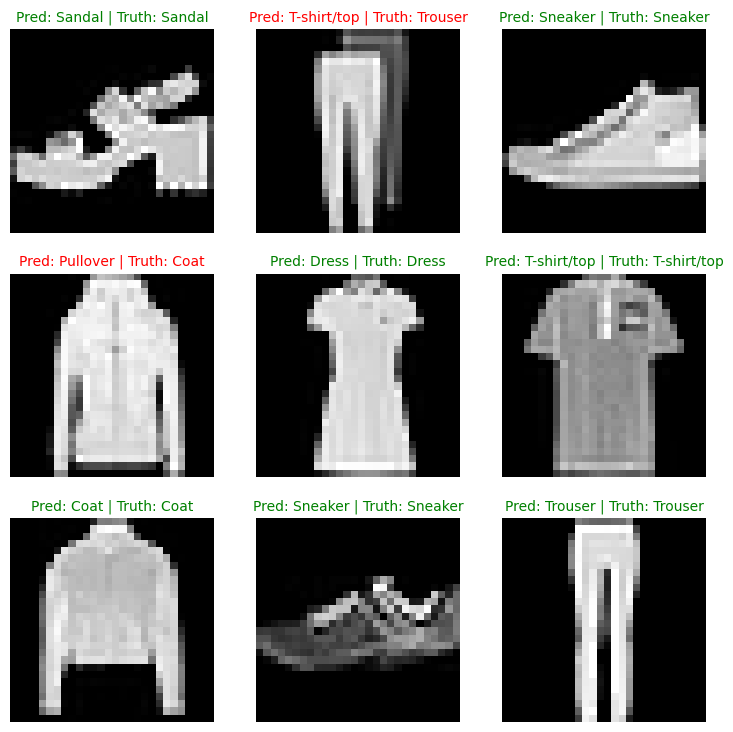

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)                      # Create a subplot
  plt.imshow(sample.squeeze(), cmap="gray")             # Plot the target image
  pred_label = class_names[pred_classes[i]]             # Find the prediction label (in text form, e.g. "Sandal")
  truth_label = class_names[test_labels[i]]             # Get the truth label (in text form, e.g. "T-shirt")
  title = f"Pred: {pred_label} | Truth: {truth_label}"  # Create the title text of the plot
  if pred_label == truth_label:
      plt.title(title, fontsize=10, c = "g")            # green text if correct
  else:
      plt.title(title, fontsize=10, c = "r")            # red text if wrong
  plt.axis(False);

Doesn't that look good!

## **5.8. Confusion Matrix for Prediction Evaluation**

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) that shows where the classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with thr trained model (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Let's start by making predictions with the trained model, `model_2`.

In [ ]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)                            # Send data and targets to target device
    y_logits = model_2(X)                                        # Do the forward pass
                                                                 # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred_labels = torch.softmax(y_logits, dim=1).argmax(dim=1) # softmax on the "logits" dim, not "batch" dim
                                                                 # (in this case, batch size = 32, so can perform on dim=1)
    y_preds.append(y_pred_labels.cpu())                          # Put predictions on CPU for evaluation
y_pred_tensor = torch.cat(y_preds)                               # Concatenate list of predictions into a tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Now we've got predictions, let's go through steps 2 & 3:
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

First we'll need to make sure we've got `torchmetrics` and `mlxtend` installed (these two libraries will help us make and visual a confusion matrix).

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


To plot the confusion matrix, we need to make sure we've got and [`mlxtend`](http://rasbt.github.io/mlxtend/) version of 0.19.0 or higher.

In [ ]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


`torchmetrics` and `mlxtend` installed, let's make a confusion matrix!
First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes = len(class_names)`.
Then we'll create a confusion matrix (in tensor format) by passing the instance the model's predictions (`preds = y_pred_tensor`) and targets (`target = test_data.targets`).
Finally we can plot the confision matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_data.targets # labels

tensor([9, 2, 1,  ..., 8, 1, 5])

2. Setup confusion matrix instance and compare predictions to targets

In [ ]:
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)
confmat_tensor

tensor([[905,   0,  17,  11,   3,   1,  57,   0,   6,   0],
        [ 12, 967,   0,  14,   2,   0,   4,   0,   1,   0],
        [ 14,   1, 842,   4,  71,   0,  66,   0,   2,   0],
        [ 67,   3,  20, 858,  23,   0,  29,   0,   0,   0],
        [  3,   1,  84,  32, 773,   0, 106,   0,   1,   0],
        [  0,   0,   0,   1,   0, 978,   0,  15,   0,   6],
        [221,   1,  68,  15,  65,   0, 611,   0,  19,   0],
        [  0,   0,   0,   0,   0,  19,   0, 951,   0,  30],
        [  3,   1,   4,   5,   5,   3,   6,   3, 970,   0],
        [  0,   0,   0,   0,   0,   9,   0,  28,   1, 962]])

3. Plot the confusion matrix

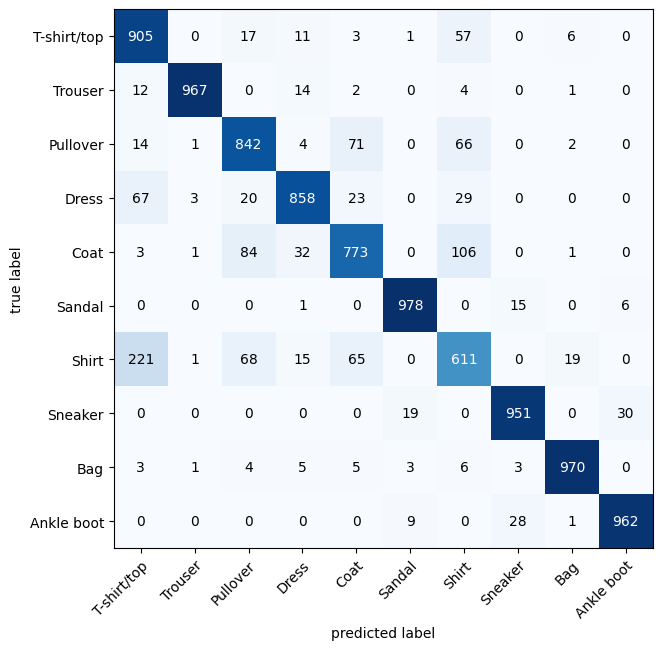

In [ ]:
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),  # matplotlib likes working with NumPy
    class_names = class_names,          # turn the row and column labels into class names
    figsize = (10, 7));

Woah! Doesn't that look good?

We can see the model does fairly well since most of the dark squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use where a model is getting things wrong.

It also hints at why the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

> **Exercise:** Use the trained `model_2` to make predictions on the test FashionMNIST dataset. Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## **5.9. Save and Load Model**

Recall that we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).
For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,                            # create parent directories if needed
                 exist_ok = True                            # if models directory already exists, don't error
                 )
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME                   # Create model save path
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH) # Only saving the state_dict() only saves the learned parameters

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.
Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [ ]:
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape = 1, # number of color channels
                                    hidden_units = 10, # try changing this to 128 and seeing what happens
                                    output_shape = len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

And now we've got a loaded model we can evaluate it with `eval_model()` to make sure its parameters work similarly to `model_2` prior to saving.

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader = test_dataloader,
                                    criterion = criterion,
                                    accuracy_metric = accuracy_metric)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261343240737915,
 'model_acc': 88.18889776357827}

Do these results look the same as `model_2_results`?

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261343240737915,
 'model_acc': 88.18889776357827}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).
If our model's results are close, the output of `torch.isclose()` should be true. Check to see if results are close to each other (if they are very far away, there may be an error)

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-08, # absolute tolerance
              rtol = 0.0001) # relative tolerance

tensor(True)

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Example solutions notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. What are 3 areas in industry where computer vision is currently being used?
2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
6. Visualize at least 5 different samples of the MNIST training dataset.
7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.
9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.
10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
11. Plot a confusion matrix comparing your model's predictions to the truth labels.
12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    * After visualing these predictions do you think it's more of a modelling error or a data error?
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Extra-curriculum
* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.
* Spend 10-minutes clicking thorugh the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?
* Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?
* For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library `timm`](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.